# Exploratory Data Analysis for Final Project

Summary:
The provided code fetches data from the Census API and loads Zillow housing data from a CSV file. It then cleans and processes the Zillow data to calculate average rents by county and city for the year 2022. Subsequently, it visualizes the average rents through bar graphs and analyzes the deciles of average rents by city.

In [15]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to fetch data from Census API
def fetch_census_data():
    url = "https://api.census.gov/data/2022/acs/acs1"
    params = {
        "get": "NAME,B25064_001E,B01002_001E,B25003_002E",
        "for": "place:67000",  # San Francisco city code
        "key": "https://api.census.gov/data/2022/acs/acs1/variables.json"  
    }

    # Make API request
    response = requests.get(url, params=params)
    
    # Convert response to DataFrame
    if response.status_code == 200:
        data = response.json()
        census_data = pd.DataFrame(data[1:], columns=data[0])
        return census_data
    else:
        print("Failed to fetch Census data:", response.status_code)
        return None

# Load Zillow data from CSV file
zillow_data = pd.read_csv('zillow_data.csv')
print(zillow_data.head())

   RegionID  SizeRank   RegionName RegionType StateName State  \
0      6181         0     New York       city        NY    NY   
1     12447         1  Los Angeles       city        CA    CA   
2     39051         2      Houston       city        TX    TX   
3     17426         3      Chicago       city        IL    IL   
4      6915         4  San Antonio       city        TX    TX   

                                   Metro          CountyName   2015-01-31  \
0  New York-Newark-Jersey City, NY-NJ-PA       Queens County  2551.448875   
1     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County  1852.874092   
2   Houston-The Woodlands-Sugar Land, TX       Harris County  1195.669376   
3     Chicago-Naperville-Elgin, IL-IN-WI         Cook County  1535.110114   
4          San Antonio-New Braunfels, TX        Bexar County   972.108311   

    2015-02-28  ...   2023-05-31   2023-06-30   2023-07-31   2023-08-31  \
0  2566.737694  ...  3384.420719  3428.940722  3459.511277  3469.870402

In [132]:
# Step 1: Filter out data for California and San Francisco-Oakland-Berkeley metro region
filtered_data = zillow_data[(zillow_data['StateName'] == 'CA') & (zillow_data['Metro'] == 'San Francisco-Oakland-Berkeley, CA')]

# Step 2: Filter out columns for the year 2022 and add 'RegionName' and 'CountyName' columns
columns_2022_with_names = ['RegionName', 'CountyName'] + [col for col in filtered_data.columns if '2022' in col]
filtered_data_2022_with_names = filtered_data[columns_2022_with_names]

# Step 3: Remove outliers and NaN rows
cleaned_data = filtered_data_2022_with_names.dropna()

# Step 4: Save the cleaned data into a separate DataFrame
cleaned_df = cleaned_data.copy()
print(cleaned_df)

               RegionName            CountyName   2022-01-31   2022-02-28  \
17          San Francisco  San Francisco County  3199.070790  3231.087650   
51                Oakland        Alameda County  2499.172456  2522.882104   
123               Fremont        Alameda County  2807.151294  2852.137883   
172               Hayward        Alameda County  2467.960362  2481.282726   
295               Concord   Contra Costa County  2655.525190  2646.370474   
324              Richmond   Contra Costa County  2565.746602  2564.202309   
346              Berkeley        Alameda County  2740.386811  2739.228825   
379               Antioch   Contra Costa County  2738.021722  2786.903499   
386           San Leandro        Alameda County  2356.151496  2360.706413   
398             San Mateo      San Mateo County  3072.205945  3118.200312   
423             Daly City      San Mateo County  2698.373039  2686.461843   
461          Redwood City      San Mateo County  3251.500548  3268.556892   

In [135]:
# Filter out columns with '2022' in their headers
columns_2022 = [col for col in cleaned_df.columns if '2022' in col]

# Create a pivot table with county name in the rows and mean of columns with '2022' in their headers
pivot_table_county_mean_2022 = cleaned_df.pivot_table(index='CountyName', values=columns_2022, aggfunc='mean')

# Display the pivot table
print(pivot_table_county_mean_2022)
 
# Create a DataFrame with the county name and the average of columns with '2022' in their headers
county_avg_2022 = pd.DataFrame({
    'CountyName': pivot_table_county_mean_2022.index,
    'Average_Rent_2022': pivot_table_county_mean_2022.mean(axis=1)
})

# Display the new DataFrame
print(county_avg_2022) 

                       2022-01-31   2022-02-28   2022-03-31   2022-04-30  \
CountyName                                                                 
Alameda County        2669.761772  2688.732036  2712.180808  2736.799527   
Contra Costa County   2863.365558  2869.924669  2901.789513  2905.509223   
Marin County          3384.366081  3379.439387  3392.097760  3403.454142   
San Francisco County  3199.070790  3231.087650  3266.867204  3281.790416   
San Mateo County      3101.339825  3126.646540  3162.746585  3186.029633   

                       2022-05-31   2022-06-30   2022-07-31   2022-08-31  \
CountyName                                                                 
Alameda County        2762.347355  2785.523036  2801.989993  2808.985580   
Contra Costa County   2952.644956  2981.027854  3038.729142  3025.377176   
Marin County          3450.224522  3480.665641  3490.852693  3490.524878   
San Francisco County  3306.230769  3323.570087  3347.458609  3360.804417   
San Mateo C

/var/folders/bb/n5p93pk55kn068ptb9p9mcqh0000gn/T/ipykernel_85177/2313899022.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CountyName', y='Average_Rent_2022', data=county_avg_2022, palette="pastel")


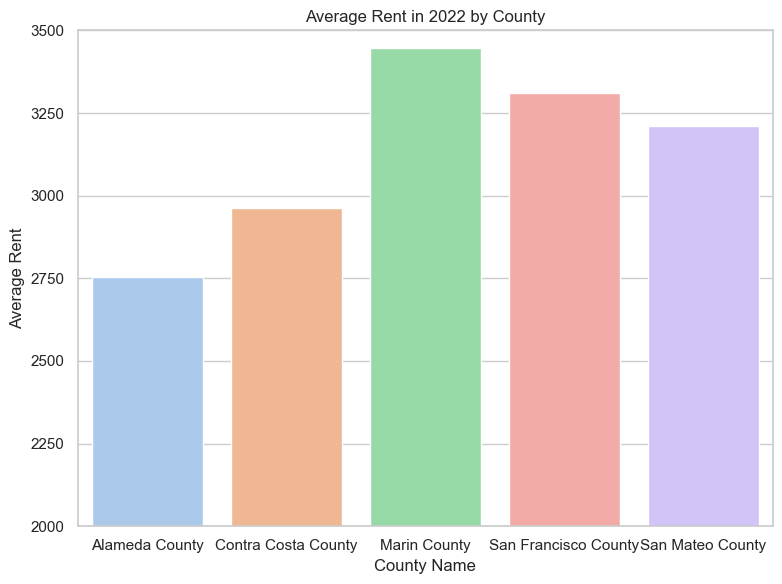

In [137]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='CountyName', y='Average_Rent_2022', data=county_avg_2022, palette="pastel")
plt.title('Average Rent in 2022 by County')
plt.xlabel('County Name')
plt.ylabel('Average Rent')
plt.ylim(2000, 3500)  # Set y-axis limits
plt.yticks(range(2000, 3750, 250))  # Set y-axis ticks with 250 increments
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [139]:
# Filter out columns with '2022' in their headers
columns_2022 = [col for col in cleaned_df.columns if '2022' in col]

# Create a pivot table with city name in the rows and mean of columns with '2022' in their headers
pivot_table_city_mean_2022 = cleaned_df.pivot_table(index='RegionName', values=columns_2022, aggfunc='mean')

# Create a DataFrame with the city name and the average of columns with '2022' in their headers
city_avg_2022 = pd.DataFrame({
    'City': pivot_table_city_mean_2022.index,
    'Average_Rent_2022': pivot_table_city_mean_2022.mean(axis=1)
})

# Merge with cleaned_df to add corresponding county name
city_avg_2022 = city_avg_2022.merge(cleaned_df[['RegionName', 'CountyName']], 
                                    left_on='City', right_on='RegionName', 
                                    how='left').drop(columns=['RegionName'])

# Sort the DataFrame in descending order based on 'Average_Rent_2022'
city_avg_2022 = city_avg_2022.sort_values(by='Average_Rent_2022', ascending=False)

# Print the top 10 entries with corresponding county name
print(city_avg_2022)

# Calculate deciles
city_avg_2022['Deciles'] = pd.qcut(city_avg_2022['Average_Rent_2022'], q=10, labels=False)

# Print the DataFrame with deciles
print(city_avg_2022)

                   City  Average_Rent_2022            CountyName
26               Orinda        4193.896531   Contra Costa County
9              Danville        4126.295645   Contra Costa County
20          Mill Valley        3837.374030          Marin County
34           San Carlos        3835.175699      San Mateo County
19           Menlo Park        3695.565855      San Mateo County
13          Foster City        3477.691422      San Mateo County
40            Sausalito        3470.373915          Marin County
23               Novato        3458.779575          Marin County
31         Redwood City        3408.866517      San Mateo County
21             Millbrae        3372.583214      San Mateo County
35        San Francisco        3311.337682  San Francisco County
41  South San Francisco        3283.692208      San Mateo County
27             Pacifica        3244.992125      San Mateo County
16            Lafayette        3207.021605   Contra Costa County
4             Brentwood  

/var/folders/bb/n5p93pk55kn068ptb9p9mcqh0000gn/T/ipykernel_85177/1085244615.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deciles', y='Average_Rent_2022', data=city_avg_2022, palette="pastel", estimator=lambda x: len(x) / len(city_avg_2022) * 100)


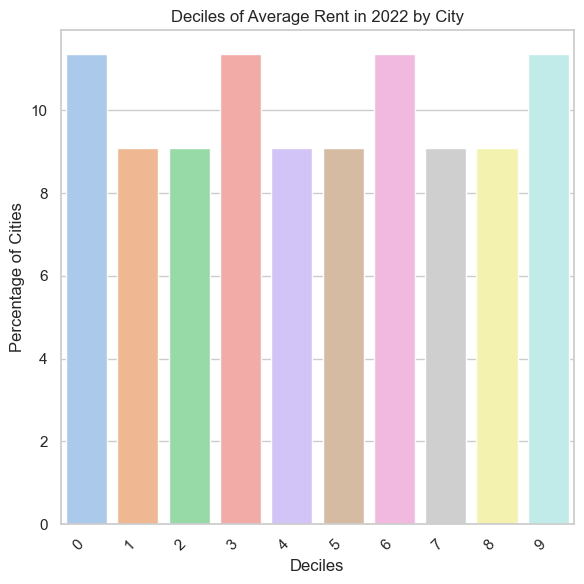

In [140]:
# Create a figure and axes for the plot
plt.figure(figsize=(6, 6))

# Plotting the bar graph
sns.barplot(x='Deciles', y='Average_Rent_2022', data=city_avg_2022, palette="pastel", estimator=lambda x: len(x) / len(city_avg_2022) * 100)
plt.title('Deciles of Average Rent in 2022 by City')
plt.xlabel('Deciles')
plt.ylabel('Percentage of Cities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Analysis:
The data analysis performed focuses on understanding the average rent trends in California's San Francisco-Oakland-Berkeley metro region for the year 2022. The code first computes the average rent by county and city, presenting them visually through bar graphs. This allows for a comparison of rental prices across different geographical areas within the metro region. The analysis further delves into the distribution of rental prices by city, examining deciles to understand the spread and concentration of rents.

Interpretation:
From the provided analysis, it's evident that there are significant variations in rental prices both across counties and cities within the San Francisco-Oakland-Berkeley metro region. The bar graphs illustrate these differences effectively, providing insights into areas with higher or lower average rents. Additionally, the decile analysis offers a deeper understanding of the distribution of rental prices, highlighting areas where rents are relatively higher or lower compared to others. This information could be valuable for various stakeholders, including renters, landlords, policymakers, and real estate investors, in making informed decisions related to housing.

Research Question for Final Project:
For the final project, I intend to investigate the factors influencing housing affordability in urban areas, focusing specifically on rental markets. The research question I aim to address is: "What socio-economic, demographic, and housing-related factors contribute to variations in rental prices across different neighborhoods within a metropolitan area?"

In the final project, my aim to use the data from the Census API and Zillow data for analysis and map the relevant results

Plan for Data Analysis:

Data Collection: Gather housing data from sources like Zillow, Census Bureau, and other relevant datasets containing socio-economic and demographic variables.
Data Preprocessing: Clean and preprocess the datasets, handling missing values, outliers, and ensuring compatibility for analysis.
Exploratory Data Analysis (EDA): Conduct exploratory analysis to understand the distribution of rental prices, socio-economic characteristics, and demographic profiles across neighborhoods.
Statistical Analysis: Employ statistical techniques to identify correlations and relationships between variables, investigating factors influencing rental prices.
Visualization and Interpretation: Visualize key findings through plots and charts, interpreting results to extract actionable insights for stakeholders.
Conclusion and Recommendations: Summarize findings, draw conclusions regarding factors impacting housing affordability, and provide recommendations for policymakers, urban planners, and stakeholders to address housing challenges and promote affordability.